In [1]:
import wandb
import pickle
import numpy as np
from MountainCarEnv import MountainCarEnv
from QLearning import QLearning

In [2]:
qLearningCar = QLearning("rgb_array")

In [3]:
all_iterations = []
all_alphas = []
all_epsilons = []
all_gammas = []

In [4]:
iterations = 20000
all_iterations.append(iterations)

alpha = 0.1 #learning_rate: variacion permitida
all_alphas.append(alpha)

epsilon = 1 #exploration_rate:  más grande mas exploracion
all_epsilons.append(epsilon)

gamma = 0.99  #discount_factor: futuro - ¿¿¿learning rate???? - mas bajo mas greedy
all_gammas.append(gamma)

In [5]:
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.001
min_eps_before_decay = 1000

In [6]:
print(all_epsilons)
print(all_iterations)

[1]
[20000]


In [6]:
divPos = qLearningCar.env.observation_space.shape[0] #2
divVel = 10

In [7]:
# start a new wandb run to track this script
wandb.init(
    # Dejar solo un proyecto
    project="MountainCar",
    # track hyperparameters and run metadata
    config={
        "initial_alpha": alpha,
        "initial_epsilon": epsilon,
        "initial_gamma": gamma,
        "Discretizacion_Pos": divPos,
        "Discretizacion_Vel": divVel,
        "Min eps before decay epsilon": min_eps_before_decay,
        #"max_exploration_rate": max_exploration_rate,
        #"max_exploration_rate": min_exploration_rate,
        #"max_exploration_rate": exploration_decay_rate
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: irazoqui-santi (santiago-irazoqui). Use `wandb login --relogin` to force relogin


In [8]:
#qLearningCar.discretizar(divPos, divVel) #pasar variables de discretizacion desde ipynb

In [19]:
pickle_in = open("Pickles\Q_auto_-170-Pos_2_Vel_10.pkl","rb")
Old_Q = pickle.load(pickle_in)

In [20]:
#qLearningCar.setQ(Old_Q)

In [22]:
Q, initial_state_Q_list, epsilon_decay_list = qLearningCar.qLearning_bajar_epsilon_1(50000, alpha, epsilon, gamma, min_eps_before_decay)


In [ ]:
iterations_to_run = 10000
iterations_total = 0
best_score = -500
pickle_count = 0
meta_iteration_count = 1
while(meta_iteration_count < 10):
    qLearningCar = QLearning("rgb_array")
    qLearningCar.discretizar(divPos, divVel)
    Q, initial_state_Q_list, epsilon_decay_list = qLearningCar.qLearning_bajar_epsilon_1(iterations, alpha, epsilon, gamma, min_eps_before_decay)
    test_value = qLearningCar.execute(100)
    
    if(test_value > best_score):
        best_score = test_value
        pickle_out = open('Q_many_resets_' + str(pickle_count) + "_" + str(test_value) +'.pkl', 'wb')
        pickle.dump(Q, pickle_out)
        pickle_out.close()
        pickle_count += 1
        best_Q = Q
        
        data = [[x, y] for (x, y) in zip(range(0, iterations_to_run), initial_state_Q_list)]
        table = wandb.Table(data=data, columns = ["x", "y"])
        wandb.log({
            "Q_train_" + str(meta_iteration_count) : wandb.plot.line(table, "x", "y",
                title="#Q train " + str(meta_iteration_count))
        })
    iterations_total += iterations_to_run
    print(iterations_total)
    print("V(Q) = " + str(test_value))
    meta_iteration_count += 1

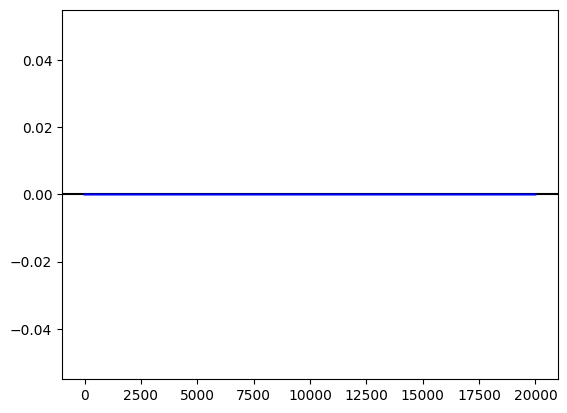

In [19]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, iterations), initial_state_Q_list, color='blue')

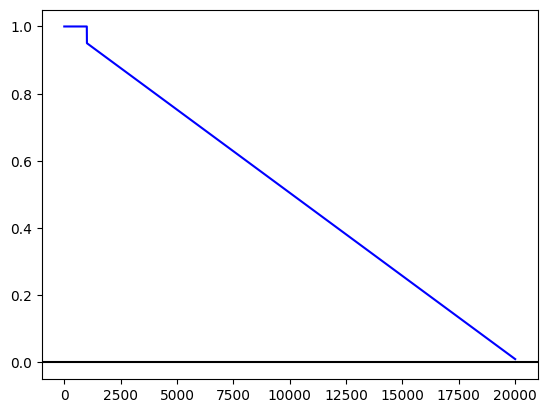

In [32]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, iterations), epsilon_decay_list, color='blue')

In [15]:
aa = [-277.05,-202.03,-217.31,-178.49,-292.87,-226.89,-227.33,-500.0,-187.83]
data = [[x, y] for (x, y) in zip(range(0, len(aa)), aa)]
table = wandb.Table(data=data, columns = ["x", "y"])
wandb.log(
    {"All new Q rewards" : wandb.plot.line(table, "x", "y",
           title="All new Q rewards")})

In [ ]:
#best_average = -500

In [13]:
average = qLearningCar.execute(100)
if(average > best_average):
    best_average = average
    best_Q = Q

In [16]:
best_average

-188.62

In [13]:
qLearningCar.rewards

[-187.83]

In [ ]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, 20), qLearningCar.rewards, color='blue')

In [16]:
data = [[x, y] for (x, y) in zip(range(0, 20), qLearningCar.rewards)]
table = wandb.Table(data=data, columns = ["x", "y"])
wandb.log(
    {"Smaller_batch_size" : wandb.plot.line(table, "x", "y",
           title="Smaller_batch_size")})

In [15]:
#tendria que subir la plot
wandb.log({"All rewards": qLearningCar.rewards})

In [16]:
# log metrics to wandb --> these go on a separate table than the configuration in config.
wandb.log({
    "iterations": all_iterations, 
    "alphas": all_alphas, 
    "epsilons": all_epsilons, 
    "gammas": all_gammas, 
})

In [17]:
wandb.log({
    "Iterations total": iterations_total 
})

In [18]:
#finished uploading
wandb.finish()

Iterations total,▁
Iterations total,90000
